# Aprendizaje no supervisado

**Tópicos de Economía de la Empresa - E2TEE9**

Todas las estadísticas y modelados de aprendizaje automático que hemos estado haciendo han sido con datos que tienen variables independientes (características) y una variable dependiente (objetivo). Hasta ahora, hemos investigado el efecto que las variables independientes tienen sobre la variable dependiente y cómo modelar y entender este efecto. Hemos asumido que sabemos cómo es la variable dependiente, *es decir*, conocemos el rango de valores que puede tomar. Esto se conoce ampliamente como aprendizaje supervisado. Hoy veremos el aprendizaje no supervisado y aprenderemos a ajustar modelos para descubrir alguna estructura en nuestros datos sin una variable objetivo para modelar.

## Datos No Etiquetados

Los datos no etiquetados, aquellos en los que no conocemos los valores de la variable dependiente, pueden ser mucho más frecuentes de lo esperado. Hay algunas razones por las que los datos pueden no estar etiquetados:

1. Los datos fueron recolectados incorrectamente (etiquetas faltantes, parciales o incorrectas).
2. No hay etiquetas en los datos, pero aún pueden encontrarse patrones posibles.
3. Hay un patrón subyacente en los datos, pero nunca lo hemos encontrado y, por lo tanto, no sabemos cómo anotarlo.

Independientemente de las razones, necesitamos encontrar formas de tratar y analizar datos no etiquetados.

A diferencia de los problemas supervisados, el concepto de sobreajuste no se aplica al aprendizaje no supervisado ya que no hay una verdad absoluta (objetivo). Como tal, **no es necesario realizar una división de entrenamiento/validación/prueba ni aplicar validación cruzada, como se vio anteriormente: el modelo se ajusta al conjunto de datos completo y se utiliza para asignar etiquetas de agrupación a todos los puntos de datos.**

### Clustering

Clustering (agrupación) implica ajustar un modelo que coloca datos similares en el mismo grupo. No tenemos la noción de entrenar un modelo utilizando algunas etiquetas ya conocidas. Más bien, queremos ver si hay algunos grupos en los datos que no han sido descubiertos. Estos grupos pueden ser representativos de características en los datos que aún no han sido cuantificadas.

Ejemplos de agrupaciones que podríamos encontrar:
* Subtipos de cáncer
* Clientes con patrones de gasto distintos
* Epicentros de terremotos (para identificar zonas peligrosas)

![cluster](https://bookdown.org/tpinto_home/Unsupervised-learning/kmeans.png)

Aunque no tengamos etiquetas de clase para cada punto de datos, parece haber una división intuitiva en los datos. Aparentemente hay tres agrupaciones distintas. 

Este ejemplo es fácil de razonar. Podemos visualizar los datos y las agrupaciones tienen límites bastante claros. ¿Pero qué sucede si la distinción no es tan obvia? Observemos los siguientes datos:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs, make_circles
import warnings
warnings.filterwarnings('ignore')

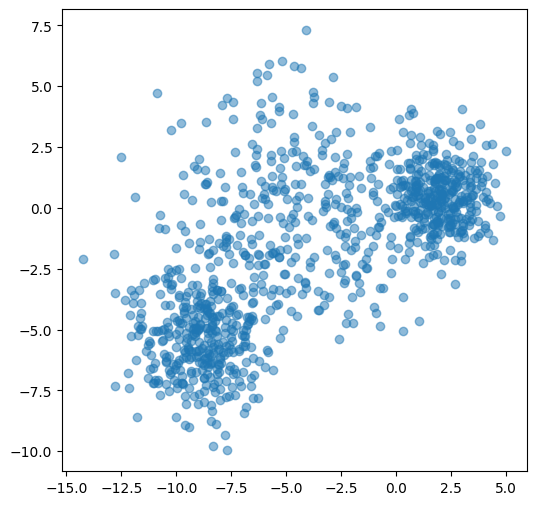

In [2]:
# Dataset 
X2, y2 = make_blobs(n_samples=1000, cluster_std=[1.5, 3, 1.2], random_state=170)

# Visualizarlo
plt.figure(figsize=(6, 6))
plt.scatter(X2[:,0], X2[:,1], alpha=.5)
plt.show()

   - `make_blobs` es una función de Scikit-learn que se utiliza para generar conjuntos de datos sintéticos en forma de "manchas" o "blobs". Es útil para la simulación y para las pruebas cuando se trabaja con técnicas de agrupación.
   - `n_samples=1000`: Esta es la cantidad total de puntos que se generarán.
   - `cluster_std=[1.5, 3, 1.2]`: Define la desviación estándar de los blobs. Estamos generando 3 blobs con desviaciones estándar de 1.5, 3 y 1.2, respectivamente. Esto significa que uno de los blobs tendrá puntos más dispersos (con una desviación estándar de 3) en comparación con los otros.
   - `random_state=170`: Es una semilla para el generador de números aleatorios, lo que garantiza que se obtenga el mismo resultado cada vez que se ejecuta el código.
   
La función devuelve dos arrays: `X2` (que contiene las coordenadas de los puntos) y `y2` (que contiene las etiquetas de los blobs a los que pertenece cada punto).

La parte que sigue es para visualizar los puntos generados:

   - `plt.figure(figsize=(6, 6))`: Define el tamaño del gráfico que se va a mostrar.
   - `plt.scatter(X2[:,0], X2[:,1], alpha=.5)`: Crea un gráfico de dispersión de los puntos. `X2[:,0]` es la primera columna de `X2` (coordenada x de cada punto) y `X2[:,1]` es la segunda columna (coordenada y de cada punto). El argumento `alpha=.5` hace que los puntos sean semi-transparentes, lo que puede ayudar a visualizar la superposición de puntos.

Hay múltiples posibles elecciones para el número de agrupaciones y las ubicaciones de estas agrupaciones.
- Puede haber dos agrupaciones más algo de ruido.
- Tal vez tres agrupaciones con varianzas muy diferentes.

¿Cómo sabemos cuál es la correcta? ¿Podemos incluso responder a esta pregunta? Además, ¿cómo encontramos cualquiera de estas agrupaciones?

## Algoritmo K-Means

### K-means Clustering

El algoritmo k-means es uno de los métodos de agrupación más populares y ampliamente utilizados en aprendizaje automático y análisis de datos. Su objetivo principal es particionar un conjunto de datos en $k$ grupos distintos, donde cada punto de datos pertenece al grupo cuyo centroide (media) es el más cercano. 

Pasos del algoritmo:

1. **Inicialización**: Elige $k$ puntos iniciales de manera aleatoria o mediante alguna otra técnica como centroides iniciales.

2. **Asignación**: Asigna cada punto de datos al centroide más cercano. Esto forma $k$ grupos.

3. **Recálculo del centroide**: Calcula el centroide (o media) de todos los puntos en cada grupo.

4. **Repetición**: Repite los pasos 2 y 3 hasta que los centroides no cambien significativamente en iteraciones consecutivas o hasta que se alcance un número máximo de iteraciones.

5. **Finalización**: Una vez que los centroides han convergido (o se ha alcanzado el número máximo de iteraciones), el algoritmo termina, y se tienen definidos los $k$ grupos.

![kmeans](https://media.geeksforgeeks.org/wp-content/uploads/20230320173915/download-(28).png)

Aspectos a considerar:

- El valor de $k$ (el número de grupos) debe ser especificado de antemano. La elección de $k$ puede influir significativamente en los resultados. Existen diferentes técnicas para ayudar a determinar el valor óptimo de $k$, como el método del codo.

- La inicialización de los centroides puede influir en la convergencia y calidad de los grupos encontrados. Algunas veces, k-means se ejecuta varias veces con diferentes inicializaciones y se elige la mejor partición.

- K-means tiene dificultades cuando los grupos tienen formas no esféricas o tamaños muy diferentes.

- Es sensible a outliers, por lo que a veces es útil combinarlo con otras técnicas o usar variantes como k-medoids.

In [3]:
from sklearn.cluster import KMeans

# Inicializar. Vamos a probar con 8 clúseters. 
kmeans = KMeans(n_clusters=8)

# Encajar. No hay el concepto de train_test split
kmeans.fit(X2)

# Predecir
cluster_labels = kmeans.predict(X2)

In [4]:
X2.shape

(1000, 2)

In [5]:
## En este caso la predicción es un número de etiqueta de "pertenecia" a un grupo
cluster_labels

array([3, 0, 7, 7, 0, 1, 1, 2, 3, 1, 3, 1, 4, 1, 4, 4, 0, 3, 0, 4, 2, 6,
       3, 0, 3, 0, 5, 6, 7, 3, 6, 0, 0, 5, 6, 4, 4, 5, 7, 4, 1, 7, 3, 3,
       2, 6, 3, 5, 6, 2, 1, 0, 7, 2, 0, 6, 5, 5, 6, 3, 6, 4, 1, 4, 2, 6,
       2, 1, 0, 7, 3, 7, 7, 5, 6, 3, 6, 6, 7, 6, 6, 1, 4, 7, 1, 7, 3, 5,
       6, 7, 2, 7, 4, 0, 7, 0, 7, 6, 5, 2, 0, 1, 1, 5, 4, 5, 7, 0, 4, 0,
       4, 3, 0, 5, 1, 4, 1, 7, 4, 2, 7, 3, 5, 3, 1, 0, 7, 7, 0, 7, 1, 4,
       0, 1, 3, 6, 7, 7, 5, 7, 7, 6, 4, 2, 7, 3, 0, 5, 1, 1, 3, 6, 7, 7,
       7, 1, 7, 3, 7, 1, 1, 1, 3, 2, 7, 7, 7, 1, 4, 7, 1, 6, 4, 7, 2, 7,
       2, 7, 3, 6, 6, 6, 0, 1, 7, 4, 7, 5, 0, 7, 5, 5, 0, 1, 0, 5, 1, 7,
       6, 1, 0, 7, 2, 7, 0, 5, 7, 2, 0, 4, 3, 6, 4, 4, 5, 5, 1, 4, 2, 3,
       3, 0, 6, 6, 1, 1, 1, 6, 7, 3, 3, 0, 1, 7, 2, 5, 5, 6, 7, 5, 1, 7,
       1, 5, 1, 6, 4, 1, 1, 2, 7, 2, 2, 7, 0, 7, 1, 4, 5, 2, 2, 5, 1, 1,
       7, 1, 1, 0, 3, 4, 2, 5, 2, 4, 7, 0, 5, 0, 5, 7, 7, 0, 7, 5, 6, 2,
       5, 2, 4, 5, 7, 0, 7, 5, 6, 7, 7, 1, 2, 1, 1,

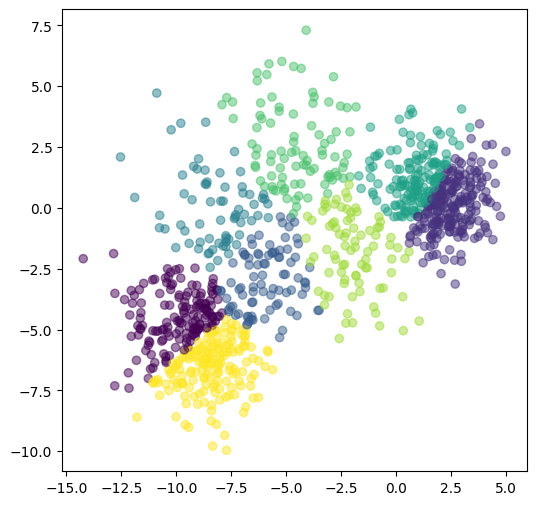

In [12]:
plt.figure(figsize=(6,6))
plt.scatter(X2[:,0], X2[:,1], c=cluster_labels, alpha=0.5)
plt.show()

### ¿Cómo trabaja el algoritmo K-Means?

Parece que en el ejemplo anterior K-means tuvo un buen desempeño pues por los colores, los clústers se encuentran agrupados relativamente cerca, pero ¿tenemos una medida objetiva de qué es bueno? Para responder a esto necesitamos entender qué está haciendo K-means. El modelo está ajustando \(K\) puntos especiales a los datos, que servirán como centros de agrupaciones (especificado por el argumento `n_clusters`). Cada uno de estos puntos especiales representa una agrupación distinta; 

Al hacer una predicción para la etiqueta de un punto de datos $x$, lo asignamos a la misma etiqueta que el centro más cercano. Podemos obtener los centros de las agrupaciones usando el atributo `cluster_centers_`:

In [6]:
# Cluster centers - están guardados luego de hacer fit
centers = kmeans.cluster_centers_
centers

array([[ -8.86988474,  -6.92728488],
       [  0.91798053,   1.30625903],
       [ -7.57994515,  -0.44405291],
       [ -7.32296838,  -4.57008734],
       [ -4.48536462,   2.61024359],
       [-10.31892826,  -4.4423831 ],
       [ -2.38188045,  -2.01944516],
       [  2.55713941,  -0.03541756]])

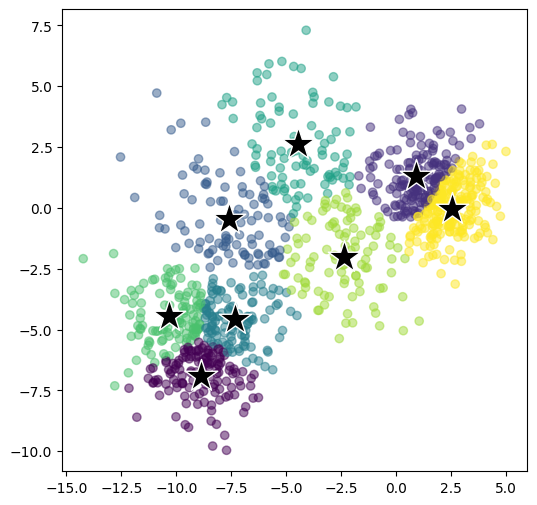

In [7]:
## Podemos ver los centros en el mismo centro
plt.figure(figsize=(6, 6))
plt.scatter(X2[:,0], X2[:,1], c=cluster_labels, alpha=0.5)
plt.scatter(centers[:, 0], centers[:, 1], 
            c='black', marker="*", edgecolor="white", s=600)
plt.show()

### Evaluando el K-means con inercia

Al ajustar un modelo K-means, estamos minimizando la suma de las distancias al cuadrado entre cada punto y su centro de agrupación asignado. Esto se conoce como la _Suma de Cuadrados Internos (WSS, por sus siglas en inglés)_ o la _inercia_. Formalmente, podemos escribir esto como:

$$\sum_{k=1}^{k} N_k \sum_{C(i)=k} \left\lVert x_i - m_k \right\rVert^2$$

where 
- $N_k$ el número de puntos en el clúster $k$,
- $m_k$ el centro de clúster $k$ 
- $C(i)$ es el clúster del punto $x_i$.

El objetivo es minimizar esta distancia total. En realidad, encontrar los centros que minimizan la distancia es muy difícil (y se sospecha que no hay una forma rápida de hacerlo). En su lugar, hay varios enfoques heurísticos que parecen funcionar bien en la práctica. La puntuación de distancia real de nuestro ajuste se almacena en la variable `inertia_`:

In [17]:
print(f'El score de inercia es : {kmeans.inertia_}')

El score de inercia es : 2778.4947841012295


Cabe señalar que la inercia no es una puntuación normalizada: más cerca de cero es mejor (siendo cero el valor más pequeño posible), pero **cada conjunto de datos tendrá su propia inercia óptima.**

### Escalando la data

K-Means es un modelo basado en distancias. Debido a esto, **la escala de los datos puede tener un gran impacto en el rendimiento del modelo**. Si nuestras características tienen escalas muy diferentes, entonces el impacto de algunas características será minimizado. Por esta razón, es común y recomendado escalar los datos antes de pasarlos a K-Means.

In [4]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

X2 = ss.fit_transform(X2)

### Cómo Elegir K

Determinar el número apropiado de agrupaciones puede ser altamente subjetivo. Veamos algunas opciones:

1. Hay una variable dependiente categórica y sabemos cuántas clases subyacentes existen. En este caso, podemos establecer K de manera adecuada. Si tuviéramos un conjunto de datos sobre el cáncer y supiéramos que hay pacientes que tienen cáncer y pacientes que no lo tienen (pero no tenemos etiquetas para ellos), podríamos ajustar 2 grupos.
2. Queremos segmentar los datos en un número predeterminado de clases. Si tuviéramos datos de ventas al por menor y sospecháramos, o quisiéramos dividir, a nuestros clientes en un número predeterminado de tipos, podríamos usar este número para nuestro K. Sin embargo, nuevamente, las agrupaciones no son lo mismo que las clases, y no hay garantía de que el agrupamiento encontraría los mismos grupos que podríamos tener en mente para las etiquetas de clases.
3. Podemos usar la inercia para ayudar a guiar nuestra selección (¿pero cómo?)

#### Score de `inercia` para diferentes parámetros K y el método del codo

In [9]:
# Evaluaremos varios valores de k
k_range = np.arange(1, 20)

# Lista vacia de valores de iners
inertia_list = []

# Iterar sobre el rango
for k in k_range:
    
    # Instanciar
    k_means_model = KMeans(n_clusters=k)

    # Encajar
    k_means_model.fit(X2)
    
    # Obtener inercia y ponerlo en las lista
    inertia_list.append(k_means_model.inertia_)    

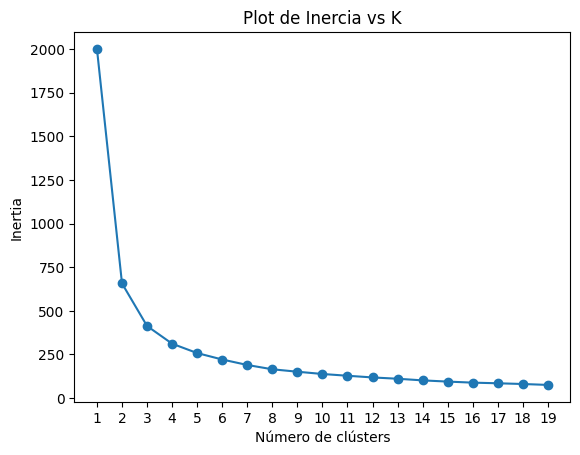

In [10]:
# Visualización
plt.figure()
plt.plot(k_range, inertia_list, marker="o")
plt.xlabel('Número de clústers')
plt.ylabel('Inertia')
plt.title('Plot de Inercia vs K')
plt.xticks(k_range)
plt.show();

Después del tercer/cuarto punto, los valores se estabilizan, lo que significa que los nuevos centroides no están reduciendo la inercia significativamente - claramente hay un punto donde existe una "ley de rendimientos decrecientes". Esto sugiere que el número ideal de clases es tres o cuatro. Este método visual se llama "método del codo". 

Aunque no es 100% científico, esto puede ser una buena aproximación. Cómo determinamos el punto de corte es difícil de decidir, a veces se basa en juicio subjetivo y en una investigación más profunda.

#### Score de silueta

El "score silueta" o "coeficiente de silueta" es una medida utilizada para interpretar y validar la consistencia interna de los datos en un análisis de clustering o agrupamiento. Esta métrica ofrece una perspectiva sobre cuán adecuadamente se han agrupado los datos y se utiliza tanto para estimar el número de clusters (o agrupamientos) como para juzgar la calidad de los clusters obtenidos.

##### Conceptos Clave:

1. **Cohesión**: Medida de cuán cerca están los puntos dentro de un cluster.
2. **Separación**: Medida de cuán distintos o separados están los clusters entre sí.

##### Cálculo del Coeficiente de Silueta:

Para un punto dado `i`, el coeficiente de silueta se calcula de la siguiente manera:

1. **a(i)**: Es la distancia media de `i` a los puntos en su mismo cluster. Mientras más pequeño sea `a(i)`, mejor, indicando que `i` está más cerca de los puntos de su propio cluster.

2. **b(i)**: Es la distancia mínima de `i` a los puntos en un cluster diferente, minimizada a través de todos los clusters. `b(i)` es la distancia del punto `i` al "vecino más cercano" de otro cluster. Cuanto mayor sea `b(i)`, mejor, indicando que `i` está lejos de los puntos de otros clusters.

3. El coeficiente de silueta `s(i)` para el punto `i` se calcula como:

   
   $$ s(i) = \frac{b(i) - a(i)}{\max\{a(i), b(i)\}}$$

   Esta fórmula garantiza que el valor de `s(i)` estará entre -1 y 1.

##### Interpretación:

- **s(i) cercano a +1**: El punto está bien agrupado y lejos de otros clusters.
- **s(i) cercano a 0**: El punto está en o muy cerca del límite de decisión entre dos clusters adyacentes.
- **s(i) cercano a -1**: El punto podría haber sido asignado al cluster incorrecto.

##### Aplicaciones:

1. **Selección de la cantidad de clusters**: Se calcula el coeficiente de silueta para varias cantidades de clusters (por ejemplo, usando k-means con diferentes valores de k). **El número de clusters que da el mayor score silueta medio indica una buena partición.**

2. **Evaluación de la calidad del clustering**: Un alto score silueta medio para todos los puntos indica un buen clustering, mientras que un score bajo puede indicar clusters superpuestos, demasiado dispersos o inapropiadamente definidos.

##### Limitaciones:

- **Sensibilidad a la escala y la densidad**: Puede ser sensible al tamaño y la densidad de los clusters, lo que podría llevar a interpretaciones engañosas si los clusters varían significativamente en estas características.
- **Rendimiento en clusters de alta dimensión**: El rendimiento y la interpretación pueden decaer en espacios de alta dimensión debido a la "maldición de la dimensionalidad".

El score silueta es una herramienta útil y poderosa en análisis de clustering, pero como con cualquier métrica, debe usarse como parte de un conjunto más amplio de herramientas y consideraciones para obtener una visión completa y precisa de la estructura de los datos.

In [13]:
from sklearn.metrics import silhouette_score

k_values = range(2, 20)
silhouette_scores = []

# Iterar sobre el rango
for k in k_values:
    
     # Instanciar y encajar
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(X2)
    
    # Obtener inercia y ponerlo en las lista
    cluster_labels = kmeans.labels_
    silhouette = silhouette_score(X2, cluster_labels)
    silhouette_scores.append(silhouette)

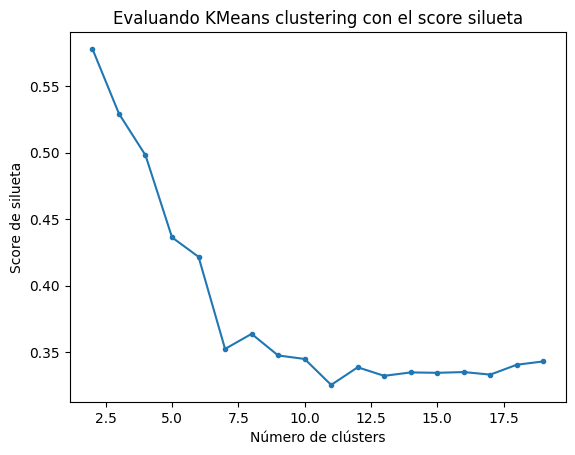

In [14]:
# Visualize the results
plt.figure()
plt.plot(k_values, silhouette_scores, marker='.')
plt.xlabel('Número de clústers')
plt.ylabel('Score de silueta')
plt.title('Evaluando KMeans clustering con el score silueta')
plt.show()

En este caso 3 es el valor más alto. 

## Usando clustering para segmentacion de clientes

In [5]:
# Leyendo el dataset
df = pd.read_csv('mall_customers.csv')
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
# standard scaler
from sklearn.preprocessing import StandardScaler

# k-means clustering
from sklearn.cluster import KMeans

# silhouette score & silhouette samples
from sklearn.metrics import silhouette_score, silhouette_samples

La función `.pairplot()` de Seaborn es una forma rápida de observar visualmente las **relaciones bivariadas** (solo para variables numéricas) en nuestro conjunto de datos.

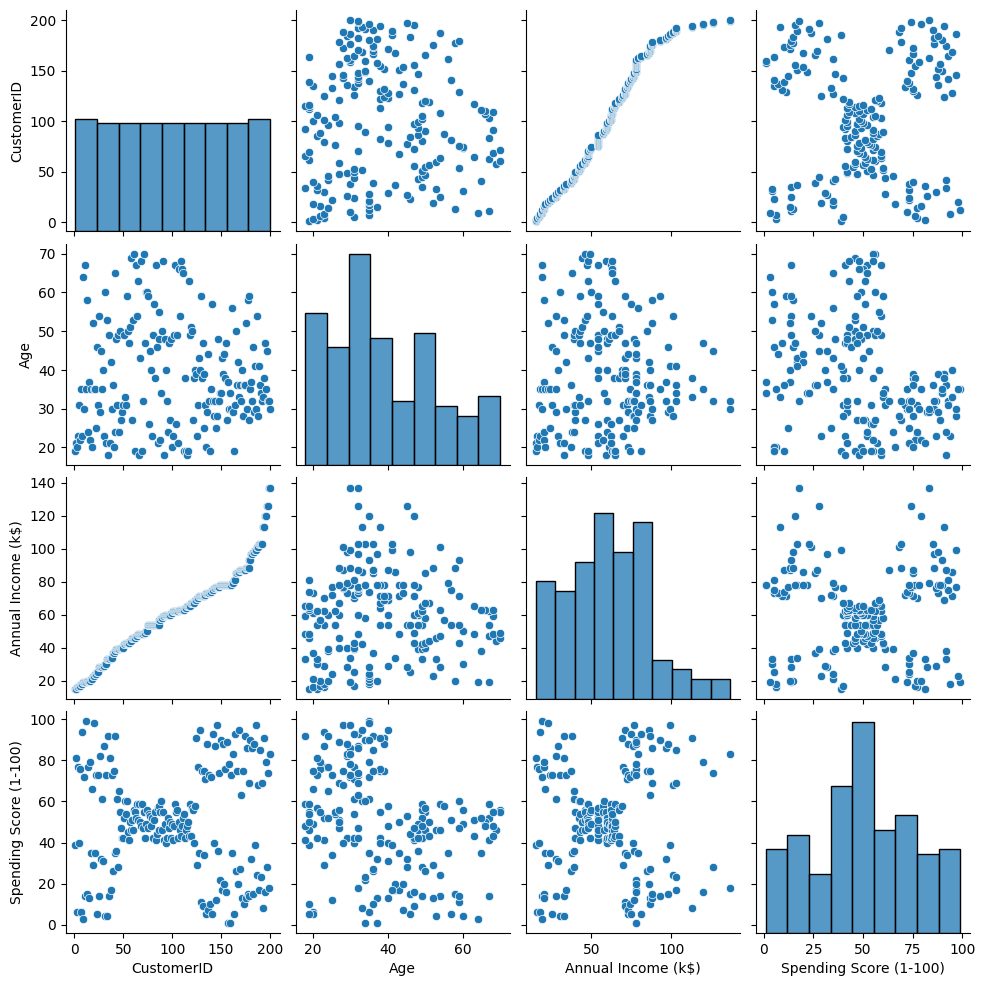

In [6]:
# seaborn pair plot
sns.pairplot(df);

Parece haber algún tipo de patrón de clustering entre `Annual Income`y `Spending Score`

### Clustering bivariado

Si tenemos datos bivariados, tenemos el lujo de poder visualizar nuestros grupos directamente. Vamos a elegir las 2 características que parecían mostrar agrupación juntas: Ingreso Anual y Puntuación de Gasto. Desde el gráfico de pares de Seaborn, podemos ver que hay aproximadamente 5 o 7 grupos entre estas dos variables.

In [7]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

Los modelos de agrupación K-means son simples e intuitivos: minimizan las distancias entre los centros de los grupos y los puntos en un grupo, pero lamentablemente requieren que especifiquemos cuántos grupos queremos que intente encontrar. Afortunadamente, tenemos una idea aproximada del número de grupos. Así que, intentemos ajustar modelos de 5-medias y 7-medias a nuestro conjunto de datos.

Dado que la agrupación k-means es un modelo basado en distancias, es una buena idea escalar nuestros datos de características. Recuerdne que no empleamos la división de entrenamiento-prueba cuando tratamos con problemas de clustering. 

In [8]:
# Inicializar el escalador
scaler = StandardScaler()

# Ajustar (fit) y transformar los datos
scaled_data = scaler.fit_transform(X)

In [12]:
# Evaluaremos varios valores de k
k_range = np.arange(1, 20)

# Lista vacia de valores de iners
inertia_list = []

# Iterar sobre el rango
for k in k_range:
    
    # Instanciar
    k_means_model = KMeans(n_clusters=k)

    # Encajar
    k_means_model.fit(scaled_data)
    
    # Obtener inercia y ponerlo en las lista
    inertia_list.append(k_means_model.inertia_)  

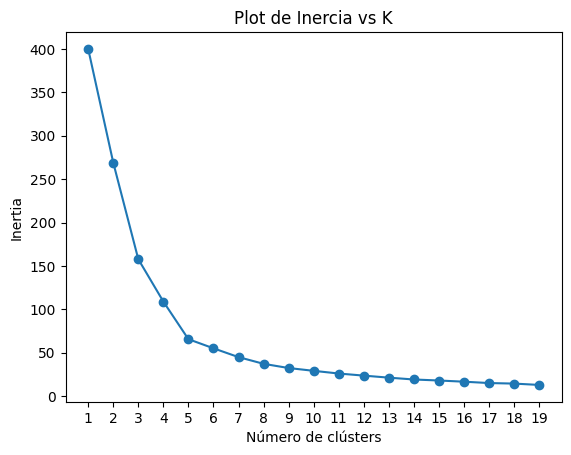

In [13]:
# Visualización
plt.figure()
plt.plot(k_range, inertia_list, marker="o")
plt.xlabel('Número de clústers')
plt.ylabel('Inertia')
plt.title('Plot de Inercia vs K')
plt.xticks(k_range)
plt.show();

Cinco clústers parece ser el número óptimo. 

### Clustering multivariado

Veamos ahora si otra característica numérica, la **edad** de los clientes, influye en la agrupación. Ahora no tendremos el lujo de visualizar la agrupación *directamente* en 2-D con las características mapeadas directamente en los ejes. Probablemente podrías buscar paquetes de Python para gráficos en 3-D, pero estos son difíciles de interpretar, así que intentaremos evaluar los siguientes modelos usando solo las métricas numéricas.

In [10]:
# Ahora, X tendrá tres columnas
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
X

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [11]:
## Escalando
X_s = StandardScaler().fit_transform(X)

In [12]:
# Evaluaremos varios valores de k
k_range = np.arange(1, 20)

# Lista vacia de valores de iners
inertia_list = []

# Iterar sobre el rango
for k in k_range:
    
    # Instanciar
    k_means_model = KMeans(n_clusters=k, random_state=1)

    # Encajar
    k_means_model.fit(X_s)
    
    # Obtener inercia y ponerlo en las lista
    inertia_list.append(k_means_model.inertia_)  

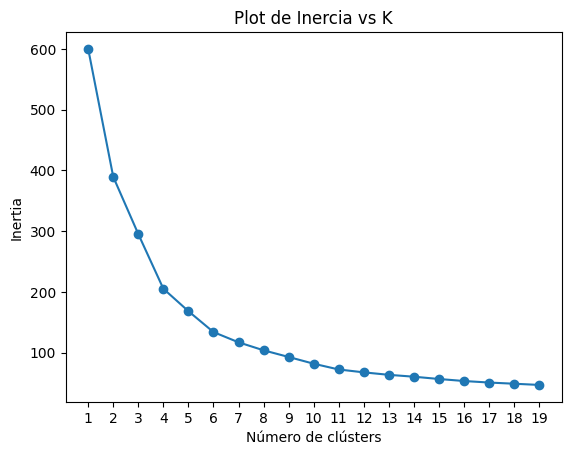

In [13]:
# Visualización
plt.figure()
plt.plot(k_range, inertia_list, marker="o")
plt.xlabel('Número de clústers')
plt.ylabel('Inertia')
plt.title('Plot de Inercia vs K')
plt.xticks(k_range)
plt.show();

4 o 6 parecen se números viables. Veamos el score silueta. 

In [14]:
k_values = range(2, 20)
silhouette_scores = []

# Iterar sobre el rango
for k in k_values:
    
     # Instanciar y encajar
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(X_s)
    
    # Obtener inercia y ponerlo en las lista
    cluster_labels = kmeans.labels_
    silhouette = silhouette_score(X_s, cluster_labels)
    silhouette_scores.append(silhouette)

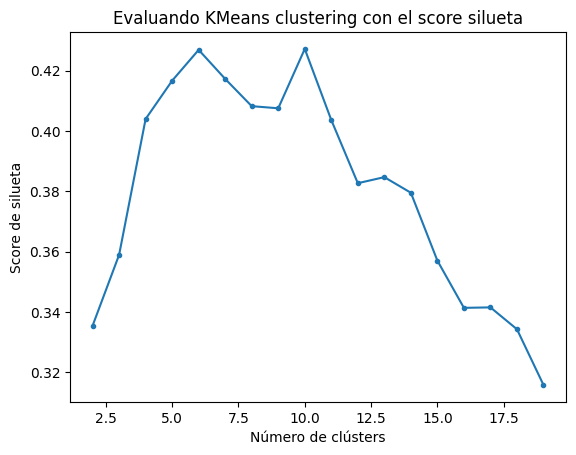

In [15]:
# Visualize the results
plt.figure()
plt.plot(k_values, silhouette_scores, marker='.')
plt.xlabel('Número de clústers')
plt.ylabel('Score de silueta')
plt.title('Evaluando KMeans clustering con el score silueta')
plt.show()

6 clústers da el score más alto. Será otra alternativa para evaluar. 

####  K-means con 4 clusters

In [16]:
km4 = KMeans(n_clusters=4, random_state=1).fit(X_s)

In [24]:
# Miremos la subdivision de la asignacion de clusters
km4.labels_

array([1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 3, 1, 1, 1, 0, 0, 0, 0, 1, 3, 2, 2, 3, 2, 3, 2, 0, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 0, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2])

In [17]:
## Ingreso la etiqueta en el dataframe
X_labeled = X.copy()
X_labeled["4k_label"] = km4.labels_
X_labeled

,Age,Annual Income (k$),Spending Score (1-100),4k_label
0,19,15,39,1
1,21,15,81,1
2,20,16,6,1
3,23,16,77,1
4,31,17,40,1
...,...,...,...,...
195,35,120,79,2
196,45,126,28,3
197,32,126,74,2
198,32,137,18,3


In [18]:
# Agrupando por etiquetas, segun la mediana de las tres variables:
X_labeled.groupby("4k_label").median().transpose()

4k_label,0,1,2,3
Age,52.0,24.0,32.0,40.5
Annual Income (k$),49.0,40.0,78.5,79.5
Spending Score (1-100),46.0,56.0,83.0,17.0


¿Tiene sentido? probemos con 6. 

#### K-means con 6 clusters

In [19]:
km6 = KMeans(n_clusters=6, random_state=1).fit(X_s)

In [20]:
# Miremos la subdivision de la asignacion de clusters
km6.labels_

array([5, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5,
       0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 2, 5, 0, 5,
       0, 5, 2, 3, 3, 3, 2, 3, 3, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 3,
       2, 2, 3, 3, 2, 2, 2, 2, 2, 3, 2, 3, 3, 2, 2, 3, 2, 2, 3, 2, 2, 3,
       3, 2, 2, 3, 2, 3, 3, 3, 2, 3, 2, 3, 3, 2, 2, 3, 2, 3, 2, 2, 2, 2,
       2, 3, 3, 3, 3, 3, 2, 2, 2, 2, 3, 3, 3, 1, 3, 1, 4, 1, 4, 1, 4, 1,
       3, 1, 4, 1, 4, 1, 3, 1, 4, 1, 3, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 2, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1])

In [21]:
## Ingreso la etiqueta en el dataframe
X_labeled6 = X.copy()
X_labeled6["6k_label"] = km6.labels_
X_labeled6

,Age,Annual Income (k$),Spending Score (1-100),6k_label
0,19,15,39,5
1,21,15,81,5
2,20,16,6,0
3,23,16,77,5
4,31,17,40,0
...,...,...,...,...
195,35,120,79,1
196,45,126,28,4
197,32,126,74,1
198,32,137,18,4


In [22]:
# Agrupando por etiquetas, segun la mediana de las tres variables:
X_labeled6.groupby("6k_label").median().transpose()

6k_label,0,1,2,3,4,5
Age,46.0,32.0,54.0,26.0,43.0,23.5
Annual Income (k$),25.0,79.0,54.0,60.0,86.0,24.5
Spending Score (1-100),15.0,83.0,49.0,49.5,16.0,76.5


Veamos ambos clústers juntos. 

In [23]:
X_labeled['6k_label']=X_labeled6["6k_label"]

In [24]:
X_labeled.head()

,Age,Annual Income (k$),Spending Score (1-100),4k_label,6k_label
0,19,15,39,1,5
1,21,15,81,1,5
2,20,16,6,1,0
3,23,16,77,1,5
4,31,17,40,1,0


In [25]:
pair_counts = X_labeled.groupby(['4k_label', '6k_label']).size().reset_index(name='counts')

In [26]:
pair_counts

,4k_label,6k_label,counts
0,0,0,17
1,0,2,45
2,0,3,2
3,0,4,1
4,1,0,4
5,1,3,29
6,1,5,24
7,2,1,39
8,2,3,1
9,3,3,6


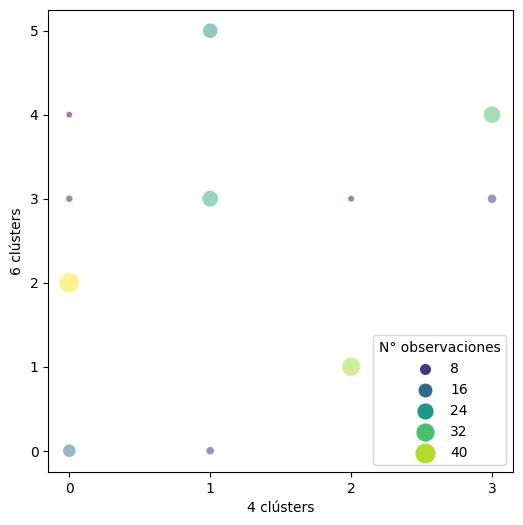

In [28]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x='4k_label', y='6k_label', hue='counts', size='counts', sizes=(20, 200), data=pair_counts, palette='viridis', alpha=0.5)
plt.ylabel('6 clústers')
plt.xlabel('4 clústers')
plt.xticks([0, 1, 2, 3])
plt.legend(title='N° observaciones')
plt.show()

En la división de 6 clústers, los clústers 3 y 4 son muy pequeños. El 3 es básicamemnte el clúster 1 cuando K=4. El cluster 4 es el 3, cuando K=4. Quedemonos con K=4. 

In [29]:
X_labeled.drop(columns='6k_label', inplace=True)

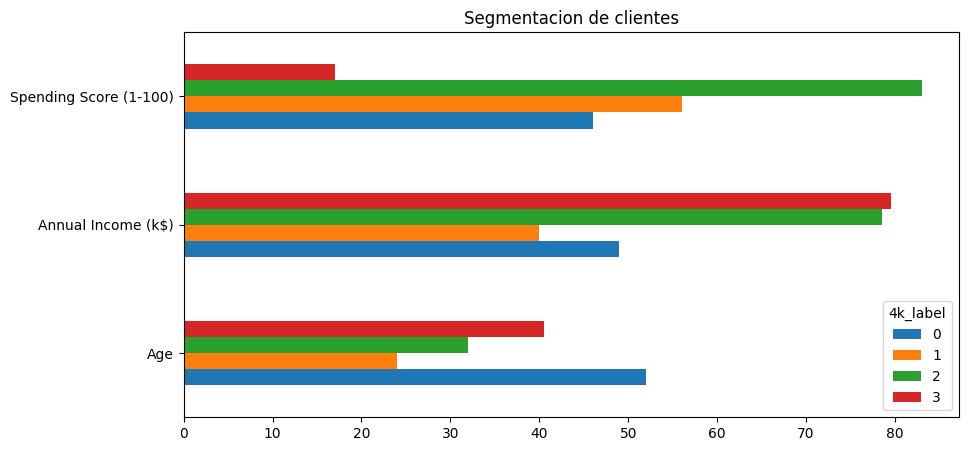

In [31]:
# Veamos la segmentacion del clientes en 4 clústers.  

X_labeled.groupby("4k_label").median().transpose().plot(figsize=(10,5), kind="barh")
plt.title('Segmentacion de clientes')
plt.show()

### Otros tipos de clustering

Esta es una breve descripción de algunos algoritmos de clustering adicionales al K-means:

1. **DBSCAN (Density-Based Spatial Clustering of Applications with Noise)**:
   - Descripción: DBSCAN agrupa puntos que están cerca en el espacio, dejando puntos más alejados en clusters más pequeños o como puntos de ruido. 
   - Uso: Es especialmente útil cuando las agrupaciones tienen formas irregulares y no son simplemente esferas o globos. También es efectivo cuando se trata de separar puntos densos de puntos de ruido o puntos menos densos.

2. **Jerárquico o Aglomerativo**:
   - Descripción: Este enfoque crea un árbol de agrupamientos. Comienza tratando cada punto como un cluster individual y luego combina de manera iterativa los clusters más cercanos.
   - Uso: Es útil para visualizar estructuras jerárquicas en los datos. El dendrograma resultante puede ofrecer una perspectiva detallada sobre la jerarquía de agrupamientos.

3. **Clustering Espectral**:
   - Descripción: Se basa en la teoría de grafos. Se usa la estructura del grafo y las características del eigenvector para segmentar el grafo en clusters.
   - Uso: Funciona bien para agrupaciones que no son necesariamente esféricas y cuando los clusters están interconectados o están cerca uno del otro.

4. **GMM (Gaussian Mixture Model)**:
   - Descripción: Es una generalización del K-means que, en lugar de asignar puntos a clusters, estima la probabilidad de que un punto pertenezca a un determinado cluster.
   - Uso: Es ideal para datos que tienen una distribución normal (gaussiana). Puede adaptarse a elipses en lugar de círculos (como K-means).

5. **Clustering basado en modelos (Model-based clustering)**:
   - Descripción: En este enfoque, se asume que los datos son generados por un modelo específico y el objetivo es identificar los parámetros del modelo que mejor se adaptan a los datos.
   - Uso: Cuando hay alguna suposición o conocimiento previo sobre el modelo que generó los datos.

## Contrastando el método clustering con la data de Difficult Pay

In [33]:
# Leyendo el dataset
dfdp = pd.read_csv('data_cal2024.csv', sep=";")
dfdp.head(10)

,score_1,score_2,riesgo_score1,riesgo_score2,interaccion_1,interaccion_2,monto,mala_transaccion,puntaje_1,puntaje_2,interaccion_suma,estado,cod_postal,ingreso_promedio_estado
0,nd,nd,1,0,0,1,50,0,5,5,10,NC,28525,53687
1,nd,malo,1,1,1,1,59,1,5,4,9,IL,60473,61456
2,nd,malo,1,1,1,1,75,0,5,4,9,SC,29642,52348
3,nd,malo,1,1,1,1,75,0,5,4,9,CA,90220,65895
4,nd,malo,1,1,1,1,75,1,5,4,9,NC,28052,53687
5,nd,malo,1,1,1,1,99,0,5,4,9,IN,46203,54785
6,nd,malo,1,1,1,1,99,0,5,4,9,AZ,85373,58462
7,nd,malo,1,1,1,1,99,1,5,4,9,AZ,85373,58462
8,nd,malo,1,1,1,1,99,1,5,4,9,CA,91730,65895
9,nd,malo,1,1,1,1,100,1,5,4,9,MN,55421,65514


In [34]:
dfdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824 entries, 0 to 823
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   score_1                  824 non-null    object
 1   score_2                  824 non-null    object
 2   riesgo_score1            824 non-null    int64 
 3   riesgo_score2            824 non-null    int64 
 4   interaccion_1            824 non-null    int64 
 5   interaccion_2            824 non-null    int64 
 6   monto                    824 non-null    int64 
 7   mala_transaccion         824 non-null    int64 
 8   puntaje_1                824 non-null    int64 
 9   puntaje_2                824 non-null    int64 
 10  interaccion_suma         824 non-null    int64 
 11  estado                   824 non-null    object
 12  cod_postal               824 non-null    int64 
 13  ingreso_promedio_estado  824 non-null    int64 
dtypes: int64(11), object(3)
memory usage: 90.2

Tenemos solo la data original, sin upsampling. Lo que queremos ver es si un algoritmo de clustering nos hubiese servido para predecir las malas transacciones. Me voy a quedar solo con las 7 variables explicativas. 

In [36]:
Xdp= dfdp[['riesgo_score1', 'riesgo_score2', 'interaccion_1', 'interaccion_2', 'monto', 'interaccion_suma', 'ingreso_promedio_estado']]

In [37]:
# Inicializar el escalador
scaler = StandardScaler()

# Ajustar (fit) y transformar los datos
scaled_data = scaler.fit_transform(Xdp)

In [38]:
# Evaluaremos varios valores de k
k_range = np.arange(1, 20)

# Lista vacia de valores de iners
inertia_list = []

# Iterar sobre el rango
for k in k_range:
    
    # Instanciar
    k_means_model = KMeans(n_clusters=k, random_state=1)

    # Encajar
    k_means_model.fit(X_s)
    
    # Obtener inercia y ponerlo en las lista
    inertia_list.append(k_means_model.inertia_) 

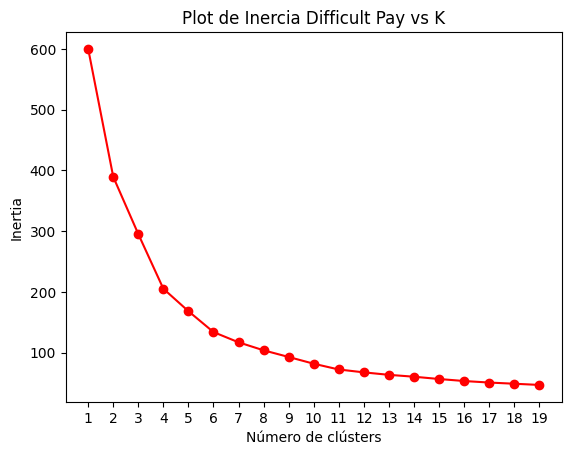

In [39]:
# Visualización
plt.figure()
plt.plot(k_range, inertia_list, marker="o", color="red")
plt.xlabel('Número de clústers')
plt.ylabel('Inertia')
plt.title('Plot de Inercia Difficult Pay vs K')
plt.xticks(k_range)
plt.show();

La data de difficult pay se apoxima a 5 clúseteres. 

In [41]:
kdp = KMeans(n_clusters=5, random_state=1).fit(Xdp)

In [42]:
## Ingreso la etiqueta en el dataframe
Xdp["label"] = kdp.labels_
Xdp.head()

,riesgo_score1,riesgo_score2,interaccion_1,interaccion_2,monto,interaccion_suma,ingreso_promedio_estado,label
0,1,0,0,1,50,10,53687,1
1,1,1,1,1,59,9,61456,3
2,1,1,1,1,75,9,52348,4
3,1,1,1,1,75,9,65895,0
4,1,1,1,1,75,9,53687,1


In [43]:
## ingreso la data de mala transaccion al dataframe
Xdp["mala_transaccion"] = dfdp['mala_transaccion']
Xdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824 entries, 0 to 823
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   riesgo_score1            824 non-null    int64
 1   riesgo_score2            824 non-null    int64
 2   interaccion_1            824 non-null    int64
 3   interaccion_2            824 non-null    int64
 4   monto                    824 non-null    int64
 5   interaccion_suma         824 non-null    int64
 6   ingreso_promedio_estado  824 non-null    int64
 7   label                    824 non-null    int32
 8   mala_transaccion         824 non-null    int64
dtypes: int32(1), int64(8)
memory usage: 54.8 KB


In [44]:
pair_counts = Xdp.groupby(['label', 'mala_transaccion']).size().reset_index(name='counts')

In [45]:
pair_counts

,label,mala_transaccion,counts
0,0,0,185
1,0,1,49
2,1,0,248
3,1,1,56
4,2,0,61
5,2,1,17
6,3,0,66
7,3,1,13
8,4,0,111
9,4,1,18


No han ningún clúster que sea predominantemente 1s. Todos tienes una mayoría de 0s. No podríamos utilizar esto como modelo de riesgo, donde si una transaccion se predice dentro de un clúster determinado se apruebe o desapruebe automáticamente. Pero, esto es un ejemplo de como podrían utilizar un algoritmo no supervisado con data que si tiene variable independiente.  

## t-SNE

El t-SNE (t-distributed Stochastic Neighbor Embedding) es una técnica de reducción de dimensionalidad, y aunque no es un algoritmo de clustering en sí mismo, es ampliamente utilizado en conjunción con técnicas de clustering por varias razones:

1. **Visualización**: En muchos casos, los datos con los que trabajamos pueden tener muchas dimensiones, lo que hace difícil su visualización. t-SNE permite reducir estos datos a 2 o 3 dimensiones, facilitando su representación gráfica.

2. **Interpretación de Clusters**: Una vez que se ha realizado un clustering en datos de alta dimensión, puede ser útil usar t-SNE para visualizar cómo se distribuyen estos clusters en un espacio de menor dimensión. Esto puede ofrecer intuiciones sobre la calidad y la naturaleza de los clusters encontrados.

![t-SNE](https://assets.tivadardanka.com/2021_08_tsne_01_mnist_tsne_original_ac9de2bf1c.png)

3. **Mejora de la Separabilidad**: t-SNE tiende a mantener puntos similares juntos y puntos disimilares separados en el espacio reducido. Esto puede resultar en una separación más clara entre diferentes clusters, especialmente si los algoritmos de clustering se aplican después de la reducción de dimensionalidad.

4. **Exploración de Datos**: Antes de aplicar técnicas de clustering, t-SNE puede usarse para una exploración preliminar de datos. Al visualizar datos en 2D o 3D usando t-SNE, a menudo es posible identificar estructuras o agrupaciones naturales en los datos, lo que puede informar decisiones posteriores sobre qué algoritmos de clustering usar o cómo configurarlos.

Sin embargo, es importante señalar algunas precauciones al usar t-SNE:

- Los resultados de t-SNE pueden variar según sus hiperparámetros, especialmente la "perplejidad". Es recomendable probar diferentes valores y entender cómo afectan los resultados.
  
- Aunque t-SNE puede mostrar clusters claramente en una visualización, no hay garantía de que estas agrupaciones sean inherentemente significativas. Siempre es crucial combinar t-SNE con un conocimiento del dominio y otras técnicas analíticas.

- t-SNE no conserva necesariamente las distancias globales entre clusters, sino más bien las relaciones locales entre puntos.

### Aplicando t-SNE al problema anterior

In [46]:
from sklearn.manifold import TSNE
my_tsne = TSNE(n_components=2) 
tsne_data = my_tsne.fit_transform(X_s)

El parámetro `n_components` define el número de dimensiones en las que se incrustarán los datos transformados. En este caso, los datos se incrustarán en un espacio bidimensional, lo cual es útil para visualizar los datos en un gráfico 2D.

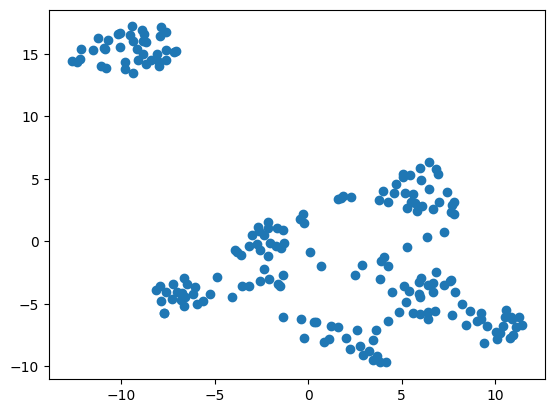

In [47]:
plt.figure()
plt.scatter(tsne_data[:,0], tsne_data[:,1])
plt.show()

El t-SNE nos da indicios de que existen al menos 3 o 4 clústers. 

## Base de Datos ERESTEL

El examen final utilizará la encuesta ERESTEL sobre proveedores de telecomunicaciones en Perú 

La encuesta completa se puede visualizar en https://repositorio.osiptel.gob.pe/handle/20.500.12630/327

Trabajeremos con un subconjunto de datos seleccionados para solucionar un problema comercial específico para la empresa Claro. 

El contrato móvil preferido en el Perú es el servicio prepago (alrededor del 60% de los usuarios activos). Los usuarios pagan en incrementos de 5 o 10 soles (S/.) para usar sus teléfonos durante una semana a 10 días. Los operadores terminan el contrato cuando la línea no ha sido utilizada durante seis meses continuos. Es una práctica común cambiar de operador simplemente comprando una nueva tarjeta SIM. En promedio, el mercado peruano pierde alrededor de 2 millones de líneas prepagas al año. Sin embargo, las activaciones siguen siendo positivas en el neto debido a nuevos usuarios y al cambio continuo de SIM.

Los planes pospago (pagados a fina del mes) son de dos tipos. El plan de control es un monto fijo facturado al final del mes. Si el usuario se queda sin minutos o datos según su contrato, puede agregar más en incrementos, similar al plan prepago. El plan pospago (clásico) simplemente está abierto a facturar todo lo que el cliente consuma. El contrato tiene un conjunto fijo de minutos y GB de datos. Cualquier uso por encima de eso se factura automáticamente a la tarifa del contrato. El mercado peruano ha migrado agresivamente de pospago a control en los últimos cinco años (cuando este último apareció como opción). Ahora, el 35% de los contratos son de control y el 5% son pospago.

El caso buscará una metodología para identificar para una nueva campaña a los clientes de prepago que tienen más probabilidades de migrar a planes pospago. 

In [48]:
df1=pd.read_csv('examen_previo.csv')

In [49]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47380 entries, 0 to 47379
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   jefe_hogar             47380 non-null  float64
 1   genero                 47346 non-null  float64
 2   edad                   47346 non-null  float64
 3   estudiante             43609 non-null  float64
 4   estado_civli           38090 non-null  float64
 5   telefono_propio        38090 non-null  float64
 6   smart_phone            30380 non-null  float64
 7   desde_cuando_smart     30380 non-null  float64
 8   mas_un_SIM             30380 non-null  float64
 9   tipo_contrato          30380 non-null  float64
 10  n_recarga_mensual      19284 non-null  float64
 11  gasto_mensual_tel      30380 non-null  float64
 12  empresa                30380 non-null  float64
 13  porque_empresa         27999 non-null  float64
 14  piensa_cambiarse       27999 non-null  float64
 15  in

### Análisis exploratorio

#### Jefe de hogar

In [83]:
df1.jefe_hogar.value_counts()

jefe_hogar
3.0     18170
1.0     15493
2.0      8968
5.0      1608
7.0      1591
6.0       988
4.0       380
10.0      148
9.0        22
8.0        12
Name: count, dtype: int64

1 es jefe de hogar. El resto es la relación jerárquica frente al jefe de hogar. Para simplificar, denominaremos a todos los no 1 como '2', no jefe de hogar. 

In [174]:
df1.loc[df1['jefe_hogar'] > 1, 'jefe_hogar'] = 2

In [175]:
df1.jefe_hogar.value_counts()

jefe_hogar
2.0    31887
1.0    15493
Name: count, dtype: int64

#### Genero

In [88]:
df1.genero.value_counts()

genero
2.0    24572
1.0    22774
Name: count, dtype: int64

In [92]:
df1.genero.isna().sum()

34

2, mujer. 1, hombre. Podríamos asignar aleatoriamente el 1 o 2 a los nan. 

In [176]:
# Extraer los valores únicos
unique_values = df1['genero'].dropna().unique()

# Reemplazar NaN con valores unicos aleatoriamente
df1['genero'] = df1['genero'].apply(lambda x: np.random.choice(unique_values) if pd.isna(x) else x)

In [94]:
df1.genero.isna().sum()

0

In [177]:
pd.crosstab(df1.jefe_hogar, df1.genero, margins=True, margins_name="Total")

genero,1.0,2.0,Total
jefe_hogar,,,
1.0,10373,5120,15493
2.0,12419,19468,31887
Total,22792,24588,47380


#### Edad

In [178]:
df1.edad.describe()

count    47346.000000
mean        33.434820
std         21.118291
min          0.000000
25%         15.000000
50%         32.000000
75%         49.000000
max        108.000000
Name: edad, dtype: float64

In [179]:
df1.edad.isna().sum()

34

Podemos imputar la edad mediana a los NaN

In [180]:
edad_mediana=df1['edad'].median()

# Reemplazar NaN con valores unicos aleatoriamente
df1['edad'] = df1['edad'].apply(lambda x: edad_mediana if pd.isna(x) else x)

In [181]:
df1.edad.isna().sum()

0

#### Telefono propio

Ojo, más del 25% tienen menos de 15 años. ¿Nos sirve tener a estos en el análisis? ¿tienen teléfono? Esta variable solo tiene 38090 registros. Quiero ver porqué existen Nan. Voy a asignarle 100 a los Nan para poder verlos en un crosstab

In [182]:
telf=100
# Reemplazar NaN con valores unicos aleatoriamente
df1['telefono_propio'] = df1['telefono_propio'].apply(lambda x: telf if pd.isna(x) else x)

In [183]:
df1.telefono_propio.value_counts()

telefono_propio
1.0      30380
100.0     9290
2.0       7710
Name: count, dtype: int64

In [184]:
pd.crosstab(df1.edad, df1[df1['telefono_propio']==100]['telefono_propio'], margins=True, margins_name="Total")

telefono_propio,100.0,Total
edad,,
0.0,419,419
1.0,428,428
2.0,602,602
3.0,735,735
4.0,733,733
5.0,820,820
6.0,768,768
7.0,804,804
8.0,893,893


Vemos que son niños, los que no tienen respuesta para telefono propio y menores a 12 año. Los de 32 son los que hemos imputados antes. Podemos descartar todos los 100. 

In [185]:
df1 = df1[df1['telefono_propio'] != 100]

In [186]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38090 entries, 0 to 47378
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   jefe_hogar             38090 non-null  float64
 1   genero                 38090 non-null  float64
 2   edad                   38090 non-null  float64
 3   estudiante             38090 non-null  float64
 4   estado_civli           38090 non-null  float64
 5   telefono_propio        38090 non-null  float64
 6   smart_phone            30380 non-null  float64
 7   desde_cuando_smart     30380 non-null  float64
 8   mas_un_SIM             30380 non-null  float64
 9   tipo_contrato          30380 non-null  float64
 10  n_recarga_mensual      19284 non-null  float64
 11  gasto_mensual_tel      30380 non-null  float64
 12  empresa                30380 non-null  float64
 13  porque_empresa         27999 non-null  float64
 14  piensa_cambiarse       27999 non-null  float64
 15  investi

Nos vamos quedando con solo los myores de 12 años. 

También podemos prescindir completamente de las otras personas sin teléfono. La pregunta empresarial específicamente trata sobre la migración de clientes existentes, es decir, personas que poseen un teléfono móvil.

In [187]:
sin_telefono = df1[df1['telefono_propio']==2].index
df1.drop(sin_telefono, inplace=True)

In [188]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30380 entries, 0 to 47378
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   jefe_hogar             30380 non-null  float64
 1   genero                 30380 non-null  float64
 2   edad                   30380 non-null  float64
 3   estudiante             30380 non-null  float64
 4   estado_civli           30380 non-null  float64
 5   telefono_propio        30380 non-null  float64
 6   smart_phone            30380 non-null  float64
 7   desde_cuando_smart     30380 non-null  float64
 8   mas_un_SIM             30380 non-null  float64
 9   tipo_contrato          30380 non-null  float64
 10  n_recarga_mensual      19284 non-null  float64
 11  gasto_mensual_tel      30380 non-null  float64
 12  empresa                30380 non-null  float64
 13  porque_empresa         27999 non-null  float64
 14  piensa_cambiarse       27999 non-null  float64
 15  investi

#### Estudiante

In [189]:
df1.estudiante.value_counts()

estudiante
2.0    25066
1.0     5314
Name: count, dtype: int64

1 es estudiante, 2 no es estudiante. 

In [190]:
df1.estudiante.isna().sum()

0

In [191]:
pd.crosstab(df1.edad, df1.estudiante, margins=True, margins_name="Total")

estudiante,1.0,2.0,Total
edad,,,
12.0,166,13,179
13.0,296,10,306
14.0,384,14,398
15.0,475,32,507
16.0,469,45,514
...,...,...,...
93.0,0,2,2
94.0,0,1,1
95.0,0,1,1


Parece extraño que los adolescentes debajo de 16 años no sean estudiantes. Puede ser un error en la compilación. Voy a tomar la decision de pasarlos todos a estudiante=1.

In [192]:
df1.loc[df1['edad']<=16 , 'estudiante']=1

In [193]:
pd.crosstab(df1.edad, df1.estudiante, margins=True, margins_name="Total")

estudiante,1.0,2.0,Total
edad,,,
12.0,179,0,179
13.0,306,0,306
14.0,398,0,398
15.0,507,0,507
16.0,514,0,514
...,...,...,...
93.0,0,2,2
94.0,0,1,1
95.0,0,1,1


#### Smart Phone

In [194]:
df1.smart_phone.value_counts()

smart_phone
1.0    26686
2.0     3559
3.0      135
Name: count, dtype: int64

Los 3s son personas que no están seguras de si tienen un smartphone. Esto complica innecesariamente el análisis. Es probable que si no saben si es un smartphone, probablemente no lo sea, así que los añadiremos al 2.

In [195]:
df1.loc[(df1['smart_phone'] == 3.0), 'smart_phone' ] = 2.0

In [196]:
df1.smart_phone.value_counts()

smart_phone
1.0    26686
2.0     3694
Name: count, dtype: int64

El 90% de usuarios tiene smartphone

#### Desde_cuando_smart

In [197]:
df1.desde_cuando_smart.value_counts()

desde_cuando_smart
5.0    20065
4.0     4085
3.0     4017
2.0     1521
1.0      692
Name: count, dtype: int64

5 es más de 3 años, el resto son subdivisiones de menos de 3 años. Simplemente los dividiremos en más y menos de 3 años.

In [198]:
df1.loc[(df1['desde_cuando_smart'] < 5.0), 'desde_cuando_smart'] = 2.0

In [199]:
df1.desde_cuando_smart.value_counts()

desde_cuando_smart
5.0    20065
2.0    10315
Name: count, dtype: int64

In [200]:
df1.loc[(df1['desde_cuando_smart'] == 5.0), 'desde_cuando_smart' ] = 1.0

In [201]:
df1.desde_cuando_smart.value_counts()

desde_cuando_smart
1.0    20065
2.0    10315
Name: count, dtype: int64

#### Mas un SIM

In [202]:
df1.mas_un_SIM.value_counts()

mas_un_SIM
2.0    29330
1.0     1050
Name: count, dtype: int64

La mayoría de gente tiene solo un SIM.

#### Tipo de contrato

In [203]:
df1.tipo_contrato.value_counts()

tipo_contrato
1.0    16151
3.0    11096
2.0     3133
Name: count, dtype: int64

1 es prepago, 2 es control y 3 es pospago. Vamos a reemplazar estos valores por sus nombres. Esto será muy útil a lo largo del análisis. Dado que esta será la variable ojetivo desde el punto de vista comercial, no va a ser parte de las variables que incluiremos en el cluster. 

In [204]:
df1.loc[(df2['tipo_contrato'] == 1.0), 'tipo_contrato' ] = 'Prepago'

In [205]:
df1.loc[(df2['tipo_contrato'] == 2.0), 'tipo_contrato'] = 'Control'

In [206]:
df1.loc[(df2['tipo_contrato'] == 3.0), 'tipo_contrato'] = 'Pospago'

In [207]:
tipo_contrato=df1.tipo_contrato.value_counts()

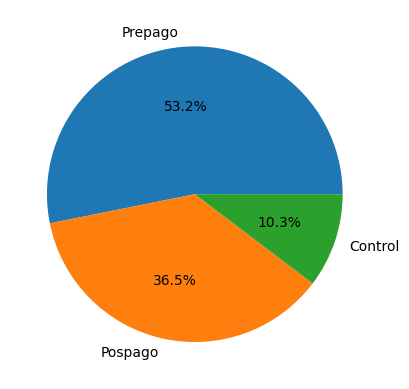

In [208]:
labels=['Prepago', 'Pospago', 'Control']
plt.pie(x=tipo_contrato.values, labels=labels, autopct='%1.1f%%')
plt.show()

Esto no es representativo del mercado. En un análisis previo, encontré que la cuota de mercado en 2021 es 60.9% prepago, 3.5% pospago y 35.6% control. Sin embargo, recuerda que excluimos a los adolescentes, quienes son dependientes y es probable que reciban un teléfono prepago de sus padres.

Además, un plan control es una especie de plan pospago. La encuesta se basa en respuestas de los propios encuestados, así que tal vez los clientes no tuvieron en cuenta esta distinción al responder. Sin embargo, los prepagos deberían ser 60.9%, lo que indica que todavía hay un sesgo hacia los contratos pospagos.

Dado que no tenemos un entendimiento claro de la dinámica entre control y pospago, tomaré los datos tal como se presentan para el propósito de este caso.

#### N_recarga_mensual

Este número representa la cantidad de veces que una línea prepago o control se recarga durante un mes dado. Cuantas más recargas, es más probable que esté pagando lo mismo que una línea pospago.

In [209]:
df1.n_recarga_mensual.value_counts()

n_recarga_mensual
3.0    6123
4.0    5615
1.0    3522
2.0    3487
5.0     421
6.0     116
Name: count, dtype: int64

In [210]:
pd.crosstab(df1.n_recarga_mensual, df1.tipo_contrato, margins=True, margins_name="Total")

tipo_contrato,Control,Prepago,Total
n_recarga_mensual,,,
1.0,2942,580,3522
2.0,33,3454,3487
3.0,61,6062,6123
4.0,79,5536,5615
5.0,6,415,421
6.0,12,104,116
Total,3133,16151,19284


Los ceros corresponden a todas las líneas pospagas. Todas las recargas ocurren en planes control y prepago. Casi todos los planes control recargan al menos una vez al mes y la mayoría de las líneas prepagas recargan dos o más veces.

- El control más económico en el mercado es de 29 soles.
- Las recargas de cinco días cuestan 5 soles y duran una semana.
- Las recargas de diez días cuestan 10 soles. 3 recargas son básicamente lo mismo que una línea control.
- El plan pospago más barato es de 35 soles, por lo que también está en las cercanías del plan control más económico.

In [211]:
df1.n_recarga_mensual.isna().sum()

11096

Habría que asignarle un cero a los que no tienen valor (corresponden a los pospago)

In [212]:
df1['n_recarga_mensual'] = df1['n_recarga_mensual'].apply(lambda x:0  if pd.isna(x) else x)

In [213]:
df1.n_recarga_mensual.value_counts()

n_recarga_mensual
0.0    11096
3.0     6123
4.0     5615
1.0     3522
2.0     3487
5.0      421
6.0      116
Name: count, dtype: int64

In [214]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30380 entries, 0 to 47378
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   jefe_hogar             30380 non-null  float64
 1   genero                 30380 non-null  float64
 2   edad                   30380 non-null  float64
 3   estudiante             30380 non-null  float64
 4   estado_civli           30380 non-null  float64
 5   telefono_propio        30380 non-null  float64
 6   smart_phone            30380 non-null  float64
 7   desde_cuando_smart     30380 non-null  float64
 8   mas_un_SIM             30380 non-null  float64
 9   tipo_contrato          30380 non-null  object 
 10  n_recarga_mensual      30380 non-null  float64
 11  gasto_mensual_tel      30380 non-null  float64
 12  empresa                30380 non-null  float64
 13  porque_empresa         27999 non-null  float64
 14  piensa_cambiarse       27999 non-null  float64
 15  investi

#### Gasto_mensual_tel

In [215]:
df1.gasto_mensual_tel.describe()

count    30380.000000
mean        30.310189
std         27.261561
min        -99.000000
25%         15.000000
50%         29.000000
75%         40.000000
max        340.000000
Name: gasto_mensual_tel, dtype: float64

Esta es una variable continua con montos errados, como el -99. 

In [216]:
df1[df1['gasto_mensual_tel']<0].gasto_mensual_tel.value_counts()

gasto_mensual_tel
-99.0    245
Name: count, dtype: int64

¿A qué tipo de contrato pertencen?

In [217]:
pd.crosstab((df1[df1['gasto_mensual_tel']<0].gasto_mensual_tel),  df1.tipo_contrato, margins=True, margins_name="Total")

tipo_contrato,Control,Pospago,Prepago,Total
gasto_mensual_tel,,,,
-99.0,48,145,52,245
Total,48,145,52,245


Están dispersos en los tres tipos de contrato. El número negativo no tiene sentido, así que lo reemplazaremos por el gasto medio de los cada uno de los tipos de contrato. 

In [218]:
media_pospago=df1[df1['tipo_contrato']=='Pospago']['gasto_mensual_tel'].mean()

In [165]:
media_pospago

46.36747837058399

In [219]:
media_prepago=df1[df1['tipo_contrato']=='Prepago']['gasto_mensual_tel'].mean()

In [168]:
media_prepago

17.31164633768807

In [220]:
media_control=df1[df1['tipo_contrato']=='Control']['gasto_mensual_tel'].mean()

In [170]:
media_control

40.44992020427705

In [221]:
df1.loc[(df1['tipo_contrato']=='Pospago') & (df1['gasto_mensual_tel']<=-99), 'gasto_mensual_tel']=media_pospago

In [222]:
df1.loc[(df1['tipo_contrato']=='Control') & (df1['gasto_mensual_tel']<=-99), 'gasto_mensual_tel']=media_control

In [223]:
df1.loc[(df1['tipo_contrato']=='Prepago') & (df1['gasto_mensual_tel']<=-99), 'gasto_mensual_tel']=media_prepago

In [224]:
df1.gasto_mensual_tel.describe()

count    30380.000000
mean        31.423424
std         24.673538
min          0.000000
25%         15.000000
50%         29.000000
75%         40.000000
max        340.000000
Name: gasto_mensual_tel, dtype: float64

#### Empresa

In [225]:
df1['empresa'].value_counts()

empresa
1.0    10238
2.0    10022
4.0     5269
3.0     4822
5.0       29
Name: count, dtype: int64

- 1: Movistar
- 2: Claro
- 3: Entel
- 4: Bitel
- 5: Otros

In [226]:
x=df1.empresa.value_counts()

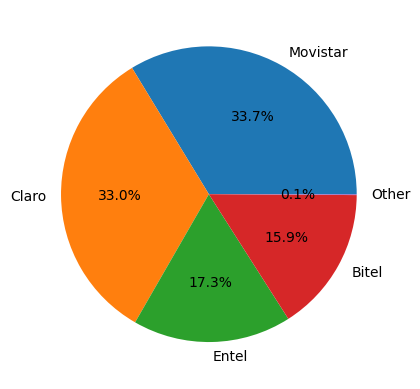

In [227]:
labels=['Movistar', 'Claro', 'Entel', 'Bitel', 'Other']
plt.pie(x, labels=labels, autopct='%1.1f%%')
plt.show()

De acuerdo a OSIPTEL los porcentajes de mercado son: 
- Movistar: 30.7%
- Claro: 28.4% 
- Entel: 21.3%
- Bitel: 19.3%
- Otro: 0.4% 

Así que la encuesta no es exactamente representativa del mercado. Bitel está subrepresentado y Claro está sobrerrepresentado. 

In [243]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30380 entries, 0 to 47378
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   jefe_hogar             30380 non-null  float64
 1   genero                 30380 non-null  float64
 2   edad                   30380 non-null  float64
 3   estudiante             30380 non-null  float64
 4   estado_civli           30380 non-null  float64
 5   telefono_propio        30380 non-null  float64
 6   smart_phone            30380 non-null  float64
 7   desde_cuando_smart     30380 non-null  float64
 8   mas_un_SIM             30380 non-null  float64
 9   tipo_contrato          30380 non-null  object 
 10  n_recarga_mensual      30380 non-null  float64
 11  gasto_mensual_tel      30380 non-null  float64
 12  empresa                30380 non-null  float64
 13  porque_empresa         27999 non-null  float64
 14  piensa_cambiarse       27999 non-null  float64
 15  investi

A partir de este momento, la data no está completa. Veremos como completarse. 

#### Porque empresa

In [228]:
df1.porque_empresa.value_counts()

porque_empresa
7.0     7285
1.0     5062
2.0     4493
3.0     3442
5.0     2064
4.0     1614
9.0     1430
6.0      540
13.0     496
12.0     472
11.0     466
8.0      382
10.0     164
14.0      89
Name: count, dtype: int64

La encuesta ofrece al encuestado demasiadas opciones y algunas son básicamente lo mismo. Para los términos del análisis, sería más conveniente agrupar. Utilizaré la clave de la encuesta (en español) para agruparlas en cinco categorías y asignar un nuevo número de variable en los veintes para que no se mezcle con las respuestas.

- Categoría 1: Recomendación: 21 - 2, 13
- Categoría 2: Mejor precio: 22   - 3, 5, 6
- Categoría 3: Mejor servicio: 23  - 4, 7, 8, 9, 10
- Categoría 4: Reputación de marca: 24 - 1, 11
- Categoría 5: Todas las demás: 25: 12, 14, 0

In [229]:
df1.loc[(df1['porque_empresa'] == 2.0) | (df1['porque_empresa'] == 13.0) , 'porque_empresa' ] = 21.0

In [230]:
df1.loc[(df1['porque_empresa'] == 3.0) | (df1['porque_empresa'] == 5.0) | (df1['porque_empresa'] == 6.0), 'porque_empresa' ] = 22.0

In [231]:
df1.loc[(df1['porque_empresa'] == 4.0) | (df1['porque_empresa'] == 7.0) | (df1['porque_empresa'] == 8.0) | (df1['porque_empresa'] == 9.0) | (df1['porque_empresa'] == 10.0), 'porque_empresa' ] = 23.0

In [232]:
df1.loc[(df1['porque_empresa'] == 1.0) | (df1['porque_empresa'] == 11.0), 'porque_empresa' ] = 24.0

In [233]:
df1.loc[(df1['porque_empresa'] == 12.0) | (df1['porque_empresa'] == 14.0) | (df1['porque_empresa'] == 0.0), 'porque_empresa'] = 25.0

In [234]:
df1.porque_empresa.value_counts()

porque_empresa
23.0    10875
22.0     6046
24.0     5528
21.0     4989
25.0      561
Name: count, dtype: int64

Se considera que el mejor servicio es la categoría principal, luego el precio, luego la reputación, después la recomendación y, finalmente, todas las demás.

In [246]:
df1.porque_empresa.isna().sum()

2381

Vamos a completarlo por la moda. 

In [247]:
df1['porque_empresa'].mode()

0    23.0
Name: porque_empresa, dtype: float64

In [248]:
df1['porque_empresa'] = df1['porque_empresa'].apply(lambda x: df1['porque_empresa'].mode().iloc[0] if pd.isna(x) else x)

In [249]:
pd.crosstab(df1.porque_empresa, df1.tipo_contrato, margins=True, margins_name="Total")

tipo_contrato,Control,Pospago,Prepago,Total
porque_empresa,,,,
21.0,466,1670,2853,4989
22.0,781,2526,2739,6046
23.0,1439,4356,7461,13256
24.0,403,2366,2759,5528
25.0,44,178,339,561
Total,3133,11096,16151,30380


#### Piensa_cambiarse  

In [235]:
df1.piensa_cambiarse.value_counts()

piensa_cambiarse
2.0    25812
1.0     2187
Name: count, dtype: int64

In [250]:
df1.piensa_cambiarse.isna().sum()

2381

In [251]:
df1['piensa_cambiarse'] = df1['piensa_cambiarse'].apply(lambda x: df1['piensa_cambiarse'].mode().iloc[0] if pd.isna(x) else x)

Pocas personas han pensado en cambiar de operador. Probablemente esto no importe mucho para la cuestión empresarial. Creo que podemos descartar esta variable.

In [252]:
df1.piensa_cambiarse.value_counts()

piensa_cambiarse
2.0    28193
1.0     2187
Name: count, dtype: int64

#### Investigo_competencia

La pregunta es con qué frecuencia la persona investiga a la competencia para cambiar de operador, en una escala del 1 al 7 según la intensidad. 99 es la respuesta de "no lo sé", que probablemente en realidad sea solo un 1, como en "nunca". 1 también es la respuesta más frecuente.

In [253]:
df1.investigo_competencia.isna().sum()

2381

In [254]:
df1.investigo_competencia.value_counts()

investigo_competencia
1.0    10538
2.0     5604
3.0     4169
4.0     3314
5.0     3197
6.0      734
7.0      443
Name: count, dtype: int64

In [255]:
df1.loc[(df1['investigo_competencia'] == -99.0), 'investigo_competencia' ] = 1.0

In [256]:
df1.investigo_competencia.value_counts()

investigo_competencia
1.0    10538
2.0     5604
3.0     4169
4.0     3314
5.0     3197
6.0      734
7.0      443
Name: count, dtype: int64

In [259]:
df1['investigo_competencia'] = df1['investigo_competencia'].apply(lambda x: df1['investigo_competencia'].mode().iloc[0] if pd.isna(x) else x)

In [260]:
pd.crosstab(df1.investigo_competencia, df1.tipo_contrato, margins=True, margins_name="Total")

tipo_contrato,Control,Pospago,Prepago,Total
investigo_competencia,,,,
1.0,1043,3871,8005,12919
2.0,682,2024,2898,5604
3.0,562,1760,1847,4169
4.0,380,1455,1479,3314
5.0,331,1450,1416,3197
6.0,66,356,312,734
7.0,69,180,194,443
Total,3133,11096,16151,30380


#### es_facil_cambiarse 

In [241]:
df1.es_facil_cambiarse.value_counts()

es_facil_cambiarse
 5.0     5204
 4.0     4772
 3.0     4464
 1.0     4265
 2.0     3641
-99.0    3095
 6.0     1579
 7.0      979
Name: count, dtype: int64

In [261]:
df1.es_facil_cambiarse.isna().sum()

2381

In [262]:
df1['es_facil_cambiarse'] = df1['es_facil_cambiarse'].apply(lambda x: df1['es_facil_cambiarse'].mode().iloc[0] if pd.isna(x) else x)

In [264]:
df1.loc[(df1['es_facil_cambiarse'] == -99.0), 'es_facil_cambiarse' ] = 1.0

In [265]:
pd.crosstab(df1.es_facil_cambiarse, df1.tipo_contrato, margins=True, margins_name="Total")

tipo_contrato,Control,Pospago,Prepago,Total
es_facil_cambiarse,,,,
1.0,735,2127,4498,7360
2.0,297,1376,1968,3641
3.0,560,1721,2183,4464
4.0,548,1977,2247,4772
5.0,722,2726,4137,7585
6.0,170,730,679,1579
7.0,101,439,439,979
Total,3133,11096,16151,30380


#### Paga_mas_esperado 

In [266]:
df1.paga_mas_esperado.value_counts()

paga_mas_esperado
2.0    27049
1.0      950
Name: count, dtype: int64

2 es un no. La mayoría de las personas pagaron lo que querían este mes. 

In [268]:
df1.paga_mas_esperado.isna().sum()

2381

In [269]:
df1['paga_mas_esperado'] = df1['paga_mas_esperado'].apply(lambda x: df1['paga_mas_esperado'].mode().iloc[0] if pd.isna(x) else x)

In [271]:
pd.crosstab(df1.paga_mas_esperado, df1.tipo_contrato, margins=True, margins_name="Total")

tipo_contrato,Control,Pospago,Prepago,Total
paga_mas_esperado,,,,
1.0,89,407,454,950
2.0,3044,10689,15697,29430
Total,3133,11096,16151,30380


#### nse  

In [272]:
df1.nse.value_counts()

nse
3.0    10470
4.0     9934
5.0     7155
2.0     2603
1.0      218
Name: count, dtype: int64

Corresponden a los sectores socioeconómicos A al E del 1 al 5. 

In [273]:
df1.nse.isna().sum()

0

#### pobreza 

In [274]:
df1.pobreza.value_counts()

pobreza
3.0    23135
2.0     5282
1.0     1963
Name: count, dtype: int64

1 es extrema pobreza, 2 es pobreza y 3 es sin pobreza.

In [276]:
df1.pobreza.isna().sum()

0

#### empleo

In [277]:
df1.empleo.value_counts()

empleo
1.0    19696
2.0    10199
Name: count, dtype: int64

In [279]:
pd.crosstab(df1.edad, df1.empleo.isna(), margins=True, margins_name="Total")

empleo,False,True,Total
edad,,,
12.0,0,179,179
13.0,0,306,306
14.0,398,0,398
15.0,507,0,507
16.0,514,0,514
...,...,...,...
93.0,2,0,2
94.0,1,0,1
95.0,1,0,1


In [278]:
df1.empleo.isna().sum()

485

Los que no tienen data de empleo son niños. Vamos a reemplazarlos por 2. 

In [280]:
df1['empleo'] = df1['empleo'].apply(lambda x:2 if pd.isna(x) else x)

In [281]:
df1.empleo.isna().sum()

0

#### ingreso_mensual

In [282]:
df1.ingreso_mensual.value_counts()

ingreso_mensual
2000.000000    1623
1500.000000    1089
1000.000000     986
1200.000000     732
1800.000000     551
               ... 
2650.000000       1
540.000000        1
1683.333333       1
1242.000000       1
2735.250000       1
Name: count, Length: 1723, dtype: int64

Es un monto en escala continua. Podemos dejarlo así, pues el escalamiento va a centrar la distribucion. Tomar nota de escalar la data antes de ejecutar el análisis de clúster. Ahora hay varios puntos de data que faltan. Serán menores de edad o dependientes en el hogar?

In [283]:
df1.ingreso_mensual.isna().sum()

8362

In [285]:
pd.crosstab(df1.edad, df1.ingreso_mensual.isna(), margins=True, margins_name="Total")

ingreso_mensual,False,True,Total
edad,,,
12.0,0,179,179
13.0,0,306,306
14.0,27,371,398
15.0,48,459,507
16.0,60,454,514
...,...,...,...
93.0,0,2,2
94.0,0,1,1
95.0,1,0,1


Vamos a asignarle 0, pues la mayoria parecen ser niños o estudiantes. 

In [286]:
df1['ingreso_mensual'] = df1['ingreso_mensual'].apply(lambda x:0 if pd.isna(x) else x)

In [287]:
df1.ingreso_mensual.isna().sum()

0

#### Distrito

In [289]:
df1.dist.value_counts()

dist
150132    918
130101    738
211101    541
150103    463
140101    420
         ... 
200404     19
160501     16
250302     12
160506     10
200302      6
Name: count, Length: 321, dtype: int64

Es el código de geolocalización del INEI donde los dos primeros digitos son departamento, los dos segundos son provincia y los dos últimos son distritos. 

In [290]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30380 entries, 0 to 47378
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   jefe_hogar             30380 non-null  float64
 1   genero                 30380 non-null  float64
 2   edad                   30380 non-null  float64
 3   estudiante             30380 non-null  float64
 4   estado_civli           30380 non-null  float64
 5   telefono_propio        30380 non-null  float64
 6   smart_phone            30380 non-null  float64
 7   desde_cuando_smart     30380 non-null  float64
 8   mas_un_SIM             30380 non-null  float64
 9   tipo_contrato          30380 non-null  object 
 10  n_recarga_mensual      30380 non-null  float64
 11  gasto_mensual_tel      30380 non-null  float64
 12  empresa                30380 non-null  float64
 13  porque_empresa         30380 non-null  float64
 14  piensa_cambiarse       30380 non-null  float64
 15  investi

In [291]:
df1.to_csv('examen_final.csv', index=False)

## Examen Final

- Día del examen: Lunes 02 de Diciembre. 9am-12pm. Sala A22
- Mismos grupos que el examen parcial.
- Presentar oralmente un documento PDF (15 minutos) el día del examen parcial con un máximo de 10 láminas y entregar un Jupyter Notebook al correo electrónico giancarlo.marchesi@udep.edu.pe hasta las 9am del día lunes 02 de diciembre. 
- El horario asignado a cada grupo estará disponible en Canvas.
- El examen utiliza un dataset. Esta disponible en el Módulo del examen en Canvas. 
- El examen consta de 4 secciones. Cada sección vale 25 puntos. 
- Las secciones 1 y 2 son preguntas técnicas. Deberán mostrar su proceso en el Notebook y sus resultados en la presentación.
- Las secciones 3 y 4 se refieren a la capacidad de síntesis del equipo, la calidad de la presentacion oral y la atención al detalle del trabajo. 

### El caso

Claro contrata a UdeP Analytics para que localice dentro de este dataset de 30380 clientes (imaginemos que tenemos sus teléfonos y podemos identificarlos) para que localice un subconjunto de clientes prepago que puedan migrar al plan control. UdeP Analytics debe buscar tanto dentro de los clientes de Claro, así como de los demás proveedores. La gerencia de Claro está convencida que el método de clustering dará los mejores resultados. El entregable final es el número de potenciales clientes (representados en tabla o gráficos) que puedan migrar a los planes control de Claro, mostrando la lógica de sus resultados. Para realizar este análisis deberán eliminar inicialmente del dataframe las variables `tipo_de_contrato` y `empresa` y guardarlo en un segund dataframe `objetos`. Asimismo, deberá modificar la variable `empresa` de numerica a objeto donde las equivalencias son: 

- 1: Movistar
- 2: Claro
- 3: Entel
- 4: Bitel
- 5: Otros

### Proceso de seleccion de número de clústers - 25 puntos

- Presentar el proceso de selección de clústers usan K-means. Evaluar los scores silueta e inercia ¿Cuántos clústers potenciales existen? (10 puntos) 
- Presentar el proceso de reduccion de dimensiones utilizando t-SNE ¿Cuántos posibles clústers existen? (10 puntos)
- En base a los criterios anteriores, seleccionen el número de clústers que consideren óptimo (5 puntos)

### Determinar el número potencial de clientes por migrar - 25 puntos

- Introducir las etiquetas resultantes con el número de clúster que le corresponde a cada observación y reincorporar las variables `tipo_contrato` y `empresa`. (5 puntos)
- Mostrar gráficamente o mediante tablas el número potencial de clientes migrables a planes Control de Claro (20 puntos)

### Conclusiones del análisis (25 puntos)
- Presentar solo 5 bullets en una sola lámina con sus conclusiones. Se descontarán puntos por no presentar exactamente 5 bullets.
- Temas importantes por abordar: # de clústers óptimo y # de clientes potenciales para el plan control de Claro. 

### Claridad en la presentación (25 puntos)
- Traer la presentación en un usb en formato HTML. Instalarla en un minuto y estar listos para comenzar (5 puntos)
- Tomar 15 minutos en total. 1 minuto por pregunta individual. 3 minutos para las conclusiones. 2 minutos para preguntas del profesor (10 puntos)
- Poder comunicar cada slide de la presentación y conclusiones con claridad.  (10 puntos)